# Histogram 1D
## This histogram class allows efficient updating of histograms, plotting and saving as HDF5

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import h5py
from geobipy import hdfRead
from geobipy import StatArray
from geobipy import Histogram1D
import numpy as np
import matplotlib.pyplot as plt

## Histogram with regular bins

In [2]:
x = np.random.randn(1000)
bins = StatArray(np.linspace(-4,4,101), 'Regular bins')

### Set the histogram using the bins, and update

In [3]:
H = Histogram1D(bins = bins)
H.update(x)

### Plot the histogram

<IPython.core.display.Javascript object>


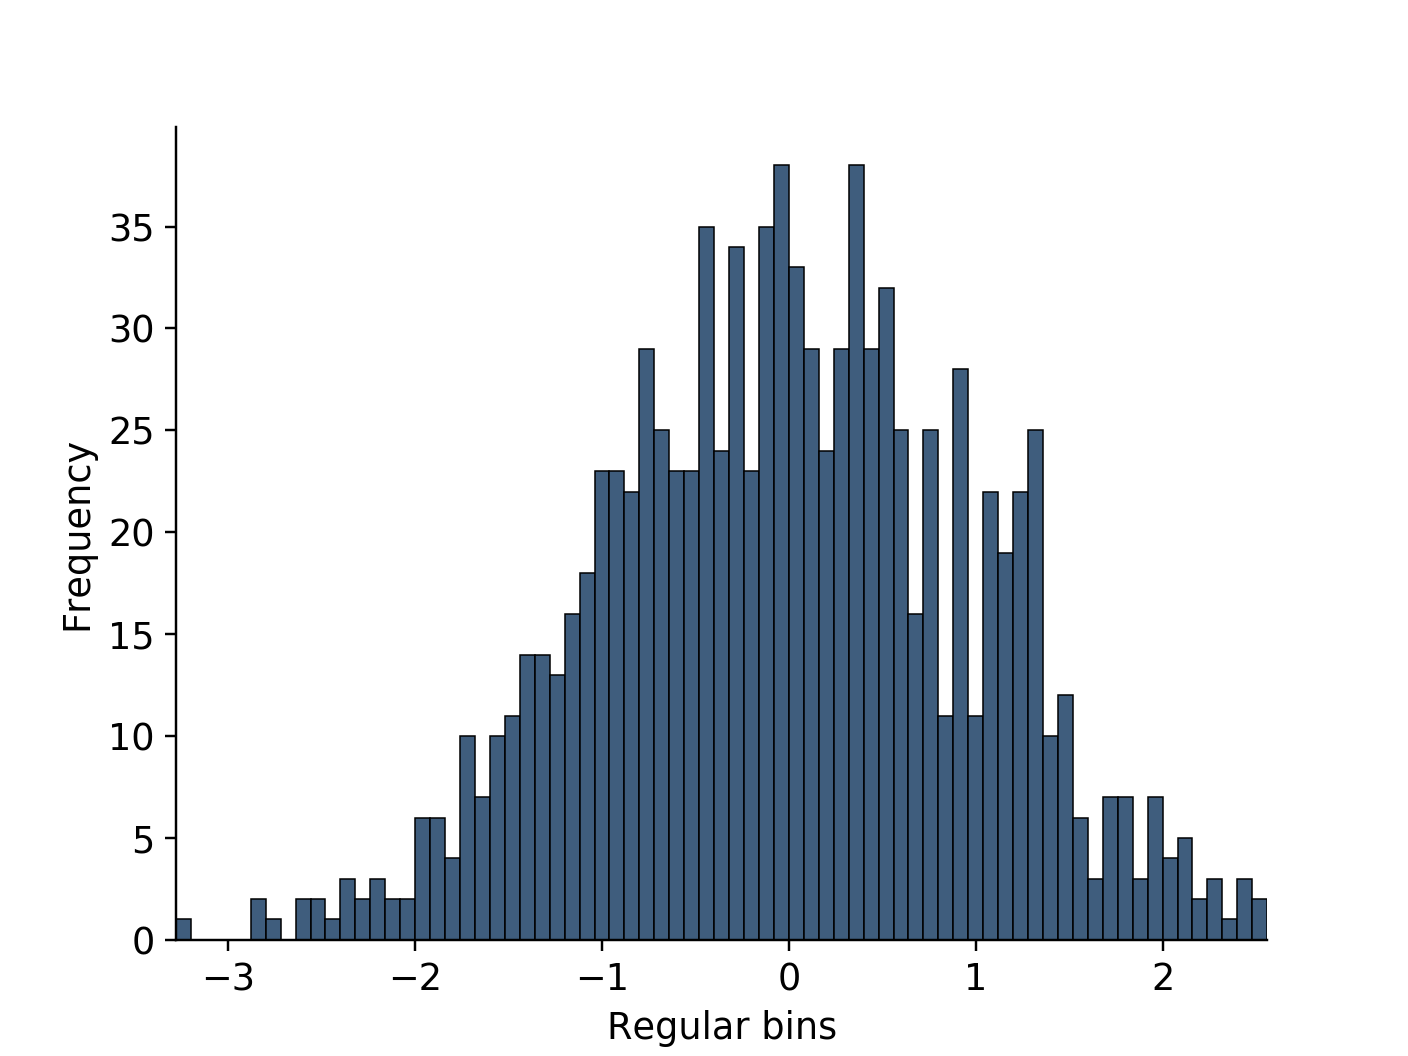

In [4]:
plt.figure()
H.plot()

We can clip additions to the histogram using clip=True. In this case outliers will land in the outermost bins.

In [5]:
x = np.full(100, 1000.0)
H.update(x, clip=True)

<IPython.core.display.Javascript object>


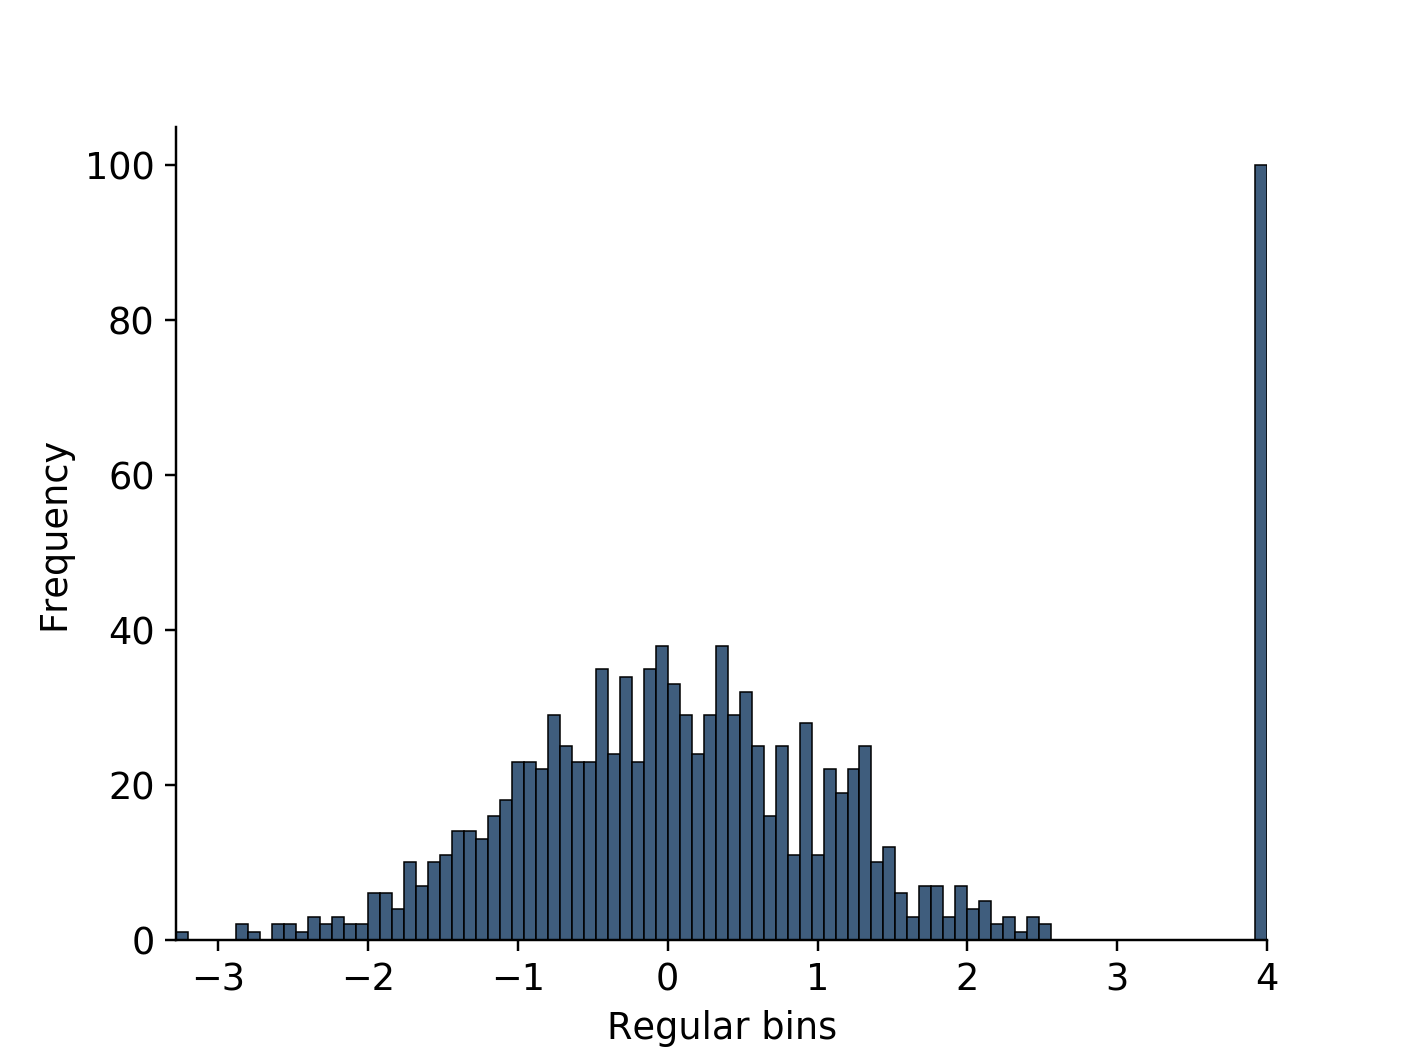

In [6]:
plt.figure()
H.plot()

### We can write/read the histogram to/from a HDF file

In [7]:
with h5py.File('Histogram.h5','w') as hf:
    H.toHdf(hf,'Histogram')

In [8]:
H1 = hdfRead.readKeyFromFiles('Histogram.h5','/','Histogram')

<IPython.core.display.Javascript object>


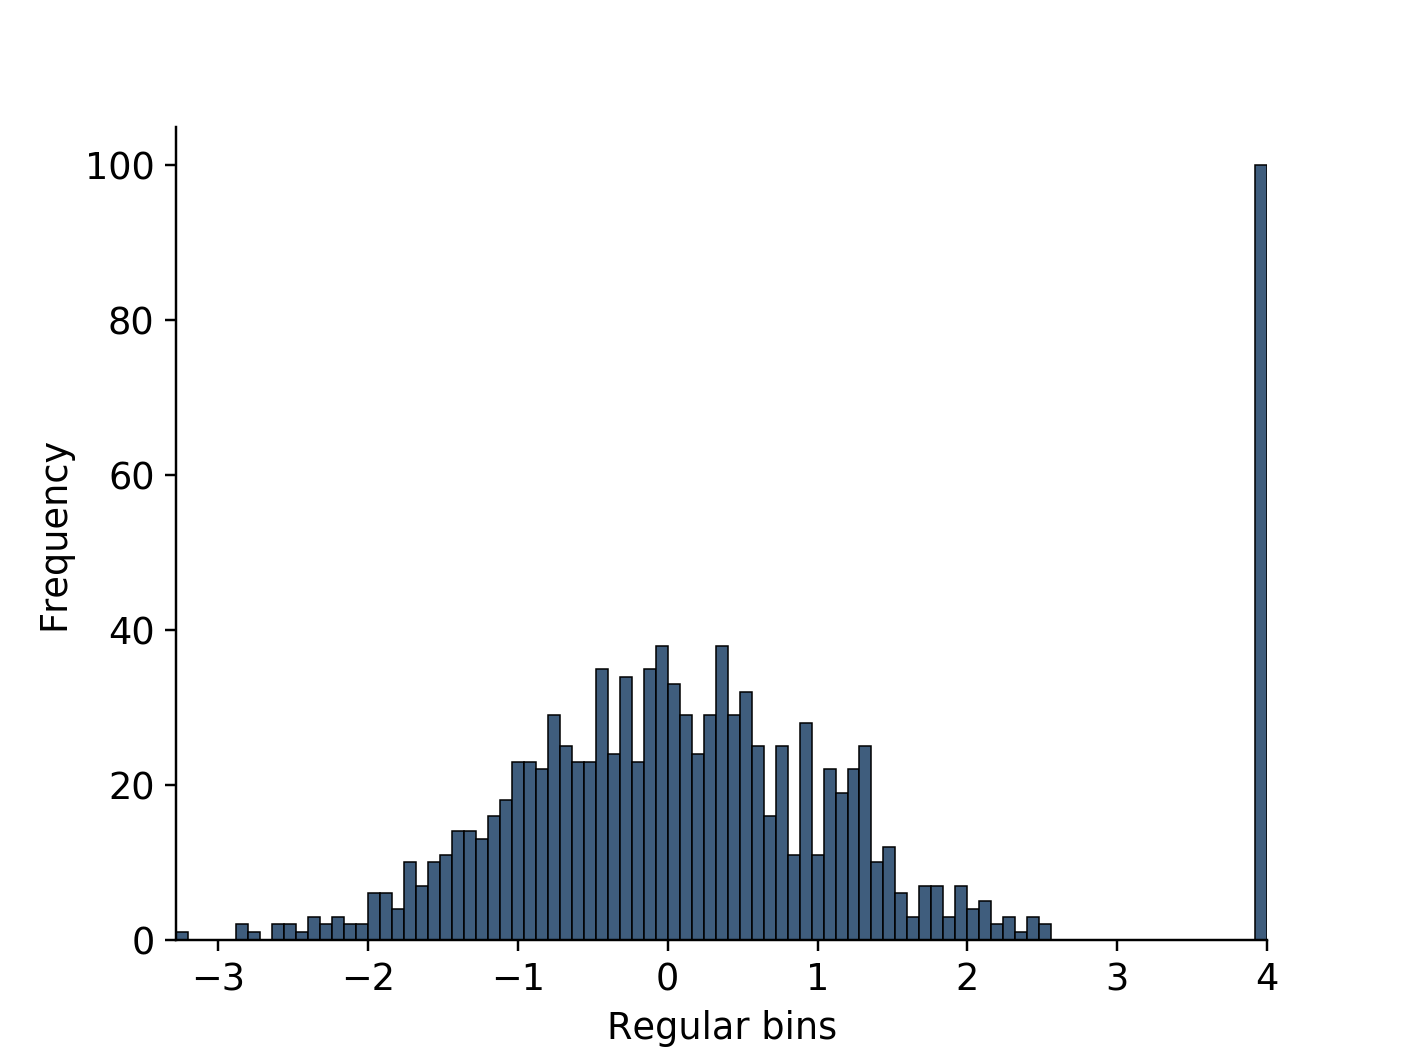

In [9]:
plt.figure()
H1.plot()

## Histogram with irregular bins

In [10]:
x = np.cumsum(np.arange(10))
irregularBins = np.hstack([-x[::-1], x[1:]])

In [11]:
edges = StatArray(irregularBins, 'irregular bins')

In [12]:
H = Histogram1D(bins=edges)

In [13]:
H.binCentres

StatArray([-40.5, -32. , -24.5, -18. , -12.5,  -8. ,  -4.5,  -2. ,  -0.5,
             0.5,   2. ,   4.5,   8. ,  12.5,  18. ,  24.5,  32. ,  40.5])

In [14]:
H.bins

StatArray([-45, -36, -28, -21, -15, -10,  -6,  -3,  -1,   0,   1,   3,
             6,  10,  15,  21,  28,  36,  45])

In [15]:
addThese = (np.random.randn(10000)*20.0) - 10.0

In [16]:
H.update(addThese, clip=False)

<IPython.core.display.Javascript object>


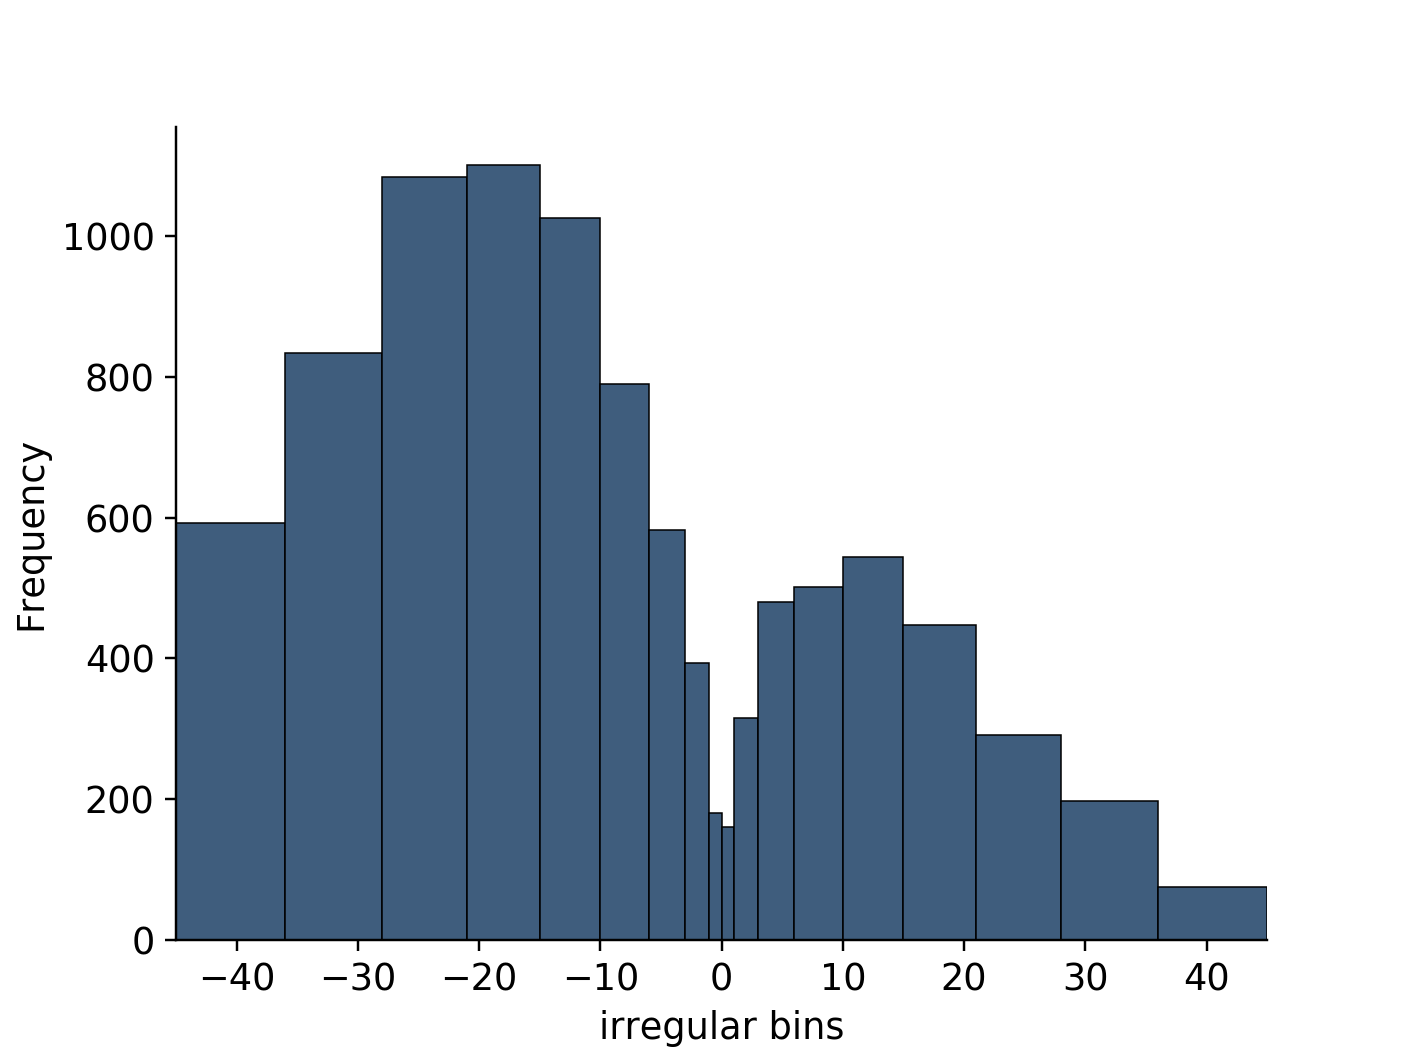

In [17]:
plt.figure()
H.plot()

<IPython.core.display.Javascript object>


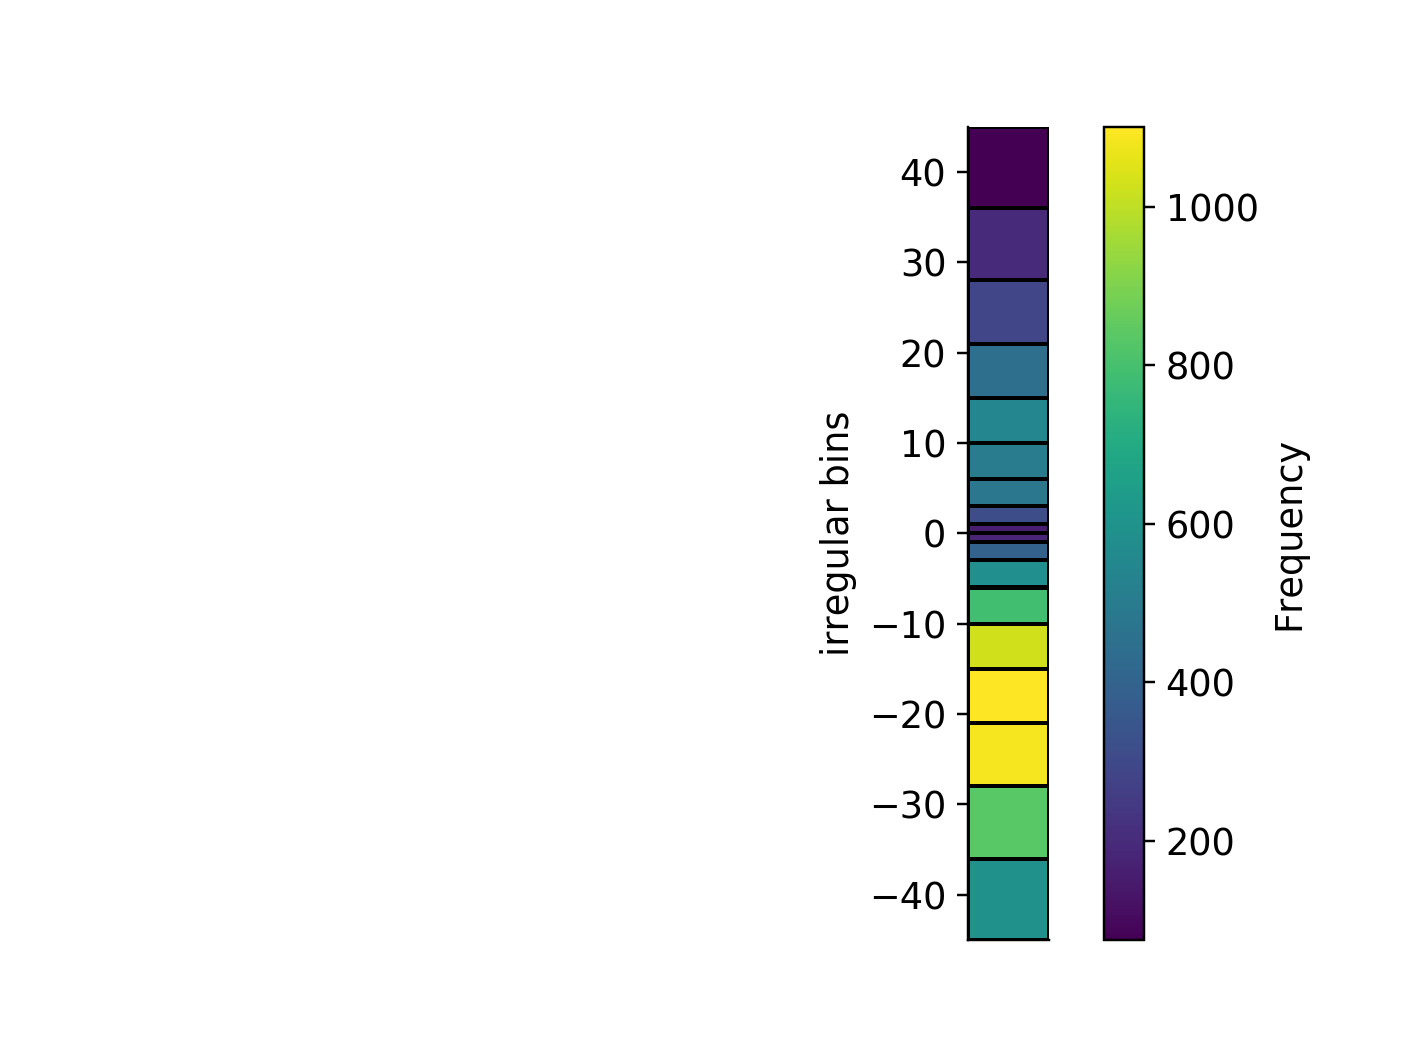

In [18]:
plt.figure()
H.pcolor(grid=True)

## Histogram with linear space entries that are logged internally

In [19]:
positiveBins = StatArray(np.logspace(-5, 3), 'positive bins')

In [20]:
positiveBins

StatArray([1.00000000e-05, 1.45634848e-05, 2.12095089e-05, 3.08884360e-05,
           4.49843267e-05, 6.55128557e-05, 9.54095476e-05, 1.38949549e-04,
           2.02358965e-04, 2.94705170e-04, 4.29193426e-04, 6.25055193e-04,
           9.10298178e-04, 1.32571137e-03, 1.93069773e-03, 2.81176870e-03,
           4.09491506e-03, 5.96362332e-03, 8.68511374e-03, 1.26485522e-02,
           1.84206997e-02, 2.68269580e-02, 3.90693994e-02, 5.68986603e-02,
           8.28642773e-02, 1.20679264e-01, 1.75751062e-01, 2.55954792e-01,
           3.72759372e-01, 5.42867544e-01, 7.90604321e-01, 1.15139540e+00,
           1.67683294e+00, 2.44205309e+00, 3.55648031e+00, 5.17947468e+00,
           7.54312006e+00, 1.09854114e+01, 1.59985872e+01, 2.32995181e+01,
           3.39322177e+01, 4.94171336e+01, 7.19685673e+01, 1.04811313e+02,
           1.52641797e+02, 2.22299648e+02, 3.23745754e+02, 4.71486636e+02,
           6.86648845e+02, 1.00000000e+03])

In [21]:
H = Histogram1D(bins=positiveBins, log='e')

#### Generate random 10**x

In [22]:
addThese = 10.0**(np.random.randn(1000)*2.0)

In [23]:
H.update(addThese)

<IPython.core.display.Javascript object>


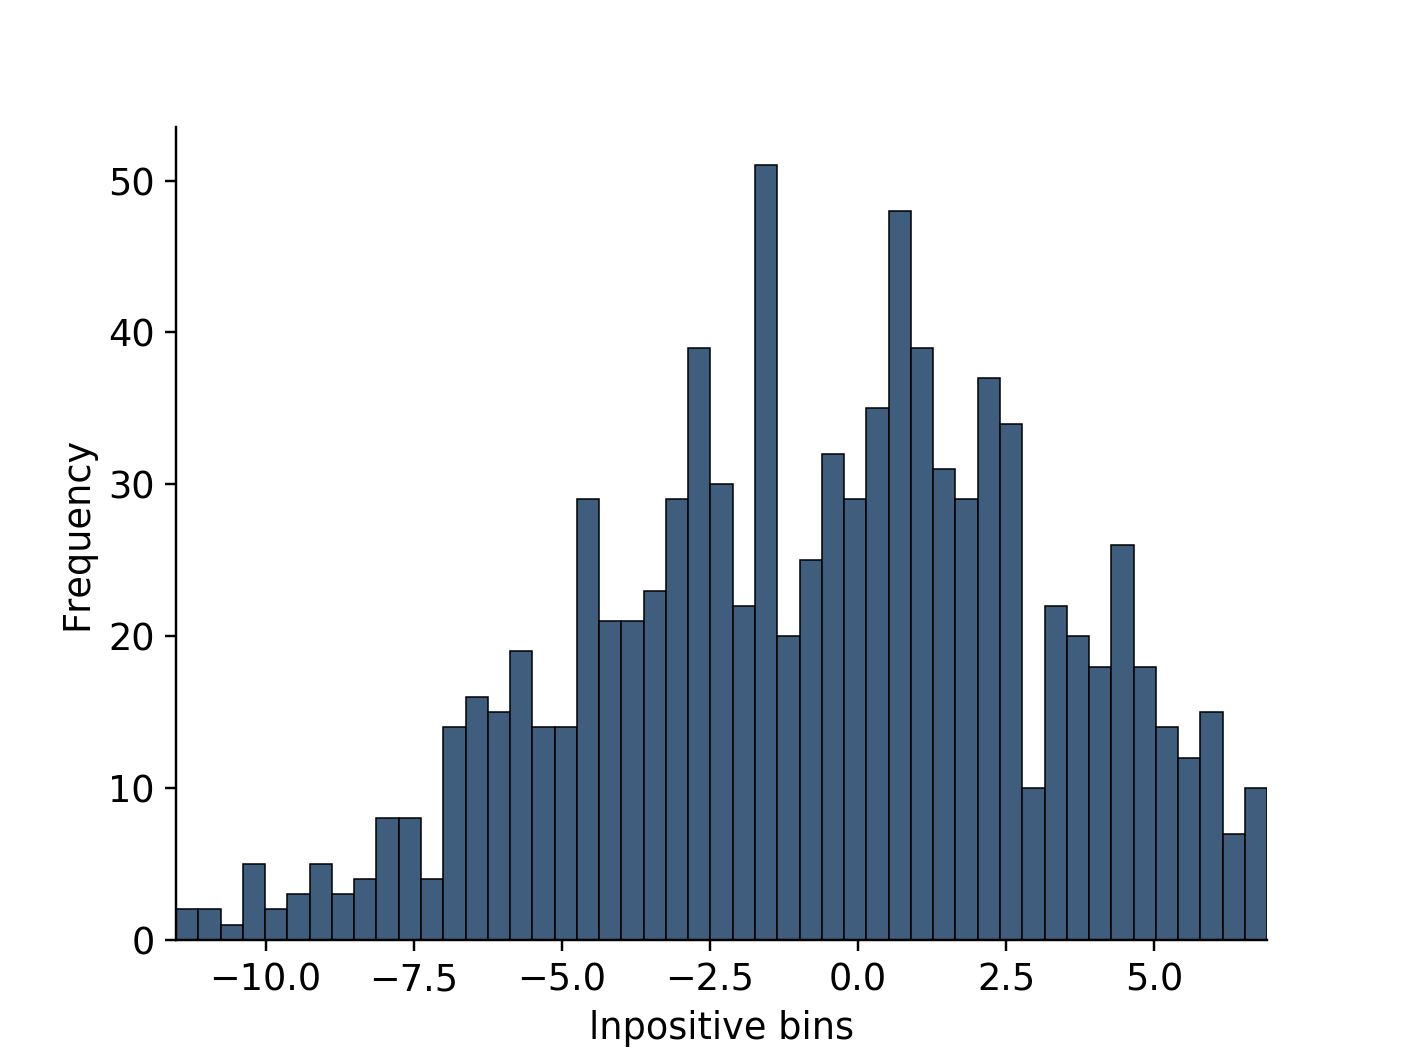

In [24]:
plt.figure()
H.plot()